In [1]:
using DataFrames
using Random
using LinearAlgebra
using Zygote
using Statistics

In [2]:
using Flux, Statistics

In [14]:
using Plots  # to draw the above figure

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1664
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
│   exception = ErrorException("Required dependency RecipesPipeline [01d81517-befc-4cb6-b9ec-a95719d0359c] failed to load from a cache file.")
└ @ Base loading.jl:1349


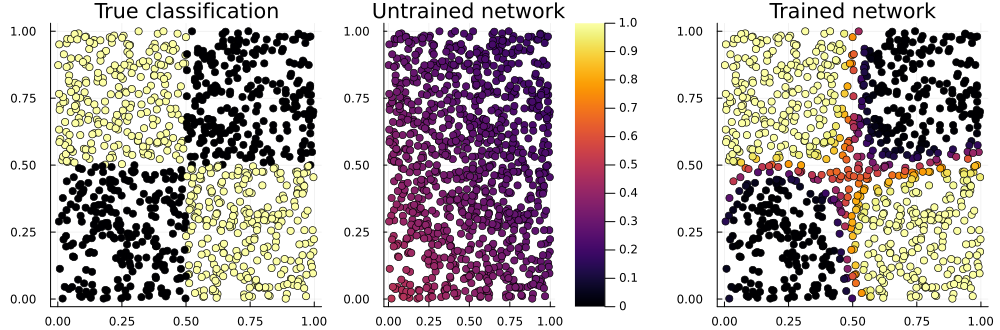

In [15]:
p_true = scatter(noisy[1,:], noisy[2,:], zcolor=truth, title="True classification", legend=false)
p_raw =  scatter(noisy[1,:], noisy[2,:], zcolor=out1[1,:], title="Untrained network", label="", clims=(0,1))
p_done = scatter(noisy[1,:], noisy[2,:], zcolor=out2[1,:], title="Trained network", legend=false)

plot(p_true, p_raw, p_done, layout=(1,3), size=(1000,330))

In [2]:
function linear_kernel(x_1, x_2)
    return x_1 * transpose(x_2)
end

linear_kernel (generic function with 1 method)

In [3]:
Base.@kwdef mutable struct SVM
    lr::Float32 = 1e-3
    epochs::Int32=150
    batch_size::Int32=64
    lmbd::Float32 = 1e-4
    kernel_function = linear_kernel
    betas=nothing
    bias=nothing
    X=nothing
end

SVM

In [5]:
svm = SVM()

SVM(0.001f0, 150, 64, 0.0001f0, linear_kernel, nothing, nothing, nothing)

In [44]:
svm.kernel_function(X, X)

100×100 Matrix{Float64}:
  1.02146    -0.988096    0.278757     0.715141  …   0.235987    -0.89529
 -0.988096    0.956266   -0.248807    -0.708922     -0.229786     0.878636
  0.278757   -0.248807    1.04593     -0.602416     -0.00576017   0.341537
  0.715141   -0.708922   -0.602416     1.15658       0.222916    -1.1086
 -0.302036    0.291548   -0.111373    -0.187655     -0.0676848    0.247242
 -0.230693    0.227863    0.155992    -0.341567  …  -0.0691356    0.334457
 -0.28477     0.278799    0.0773053   -0.326854     -0.0770041    0.343237
 -0.622572    0.62097     0.701785    -1.15272      -0.206891     1.07223
 -0.420486    0.410139    0.042933    -0.424062     -0.108551     0.463799
 -0.877335    0.837688   -0.750654    -0.193816     -0.165706     0.460146
  0.88711    -0.86592    -0.120298     0.919097  …   0.231163    -0.996443
  0.266055   -0.261693   -0.128797     0.351897      0.0760361   -0.354854
  0.0389458  -0.0320274   0.273337    -0.188777     -0.0100072    0.12456
  ⋮  

In [2]:
X = zeros(Float64, 2, 3) 
Y = ones(3)

3-element Vector{Float64}:
 1.0
 1.0
 1.0

In [3]:
K = transpose(X) * X

3×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [7]:
function predict(betas, bias, x)
    x * transpose(x) * transpose(betas) .+ bias 
end

predict (generic function with 1 method)

In [8]:
function hinge_loss(scores, labels)
    return mean(relu(ones(size(scores)) .- dot(scores, labels))) # должны быть только не ноль но есть релу
end

hinge_loss (generic function with 1 method)

In [9]:
function loss(x, y, betas, bias)
    preds = predict(betas, bias, x)
    return 0.01 * sum(betas * transpose(betas)) + hinge_loss(preds, y) # убрал K??
end

loss (generic function with 1 method)

In [10]:
using Flux: update!

In [11]:
function fit(X, Y)
    betas = rand(1, size(X, 1))
    bias = rand(1)
    println(Flux.params(betas, bias))

    opt = Flux.Adam(0.001)
    for epoch in 1:15
        θ = Flux.params(betas, bias)
        gs = gradient(() -> loss(X, Y, betas, bias), θ)
        for p in (betas, bias)
            update!(opt, p, gs[p])
        end
    end
    return [betas, bias]
end

fit (generic function with 1 method)

In [24]:
params = fit(X, Y)

Params([[0.09478097579829037 0.8293927647785374 0.5804274273134431 0.23315997083152895 0.4995804241155708 0.4462386735407864 0.46730659765243077 0.6247546638846887 0.2529721729305604 0.9479633371663683 0.4508068488971404 0.9721966098472391 0.13622288797920246 0.22492010774444993 0.8438795471969207 0.2589367704693477 0.9443665226537543 0.06515707070010401 0.4174253296476199 0.3708615530413364 0.35884936569750314 0.3029926784583826 0.7399043221924289 0.18112281676309983 0.38692645296186645 0.3960851275987526 0.8942624656572049 0.9096977095083093 0.8719840664841827 0.02567193960214109 0.19743116306289898 0.5611952133281104 0.27971854336232926 0.9022338750087313 0.4428503010638445 0.7154483685937097 0.2622310180528322 0.4447676781477754 0.9182186503723228 0.35573932224049165 0.9260937963708717 0.8008800782179916 0.6810296397145655 0.1542659871632135 0.9080891246541235 0.7909970087453669 0.9460531533049397 0.039602076672789144 0.5165393401361068 0.005910125433892688 0.797901183312742 0.9036

2-element Vector{Array{Float64}}:
 [0.07990277353566552 0.8144054343830703 … 0.9335035251453642 0.27287068138045184]
 [0.5633974822118707]

In [25]:
res = X * transpose(X) * transpose(params[1]) .+ params[2]

100×1 Matrix{Float64}:
  0.5699702803667932
  0.27128633986592715
  0.11163065720355037
  0.6990207698968112
  0.5078236054141217
  0.37371814477110166
 -0.2852679477380805
  1.3597975685179253
 -0.013067989260862833
  0.3398436150095544
  0.19579347789936474
  0.8502178128537119
  0.20412503722666664
  ⋮
  0.40133933217179285
  0.24897120598784456
  0.845974968490119
  0.6559168294350389
  0.4074478515618861
  0.8290021397470818
  0.3498684345584814
 -0.16943692304425662
  0.6996147426788147
 -0.09449265440695054
 -0.31568516322201634
 -0.3068980721186293

In [26]:
answer = ones(size(X)[1]) * (0)

100-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [27]:
inds = findall(>(0), res)

90-element Vector{CartesianIndex{2}}:
 CartesianIndex(1, 1)
 CartesianIndex(2, 1)
 CartesianIndex(3, 1)
 CartesianIndex(4, 1)
 CartesianIndex(5, 1)
 CartesianIndex(6, 1)
 CartesianIndex(8, 1)
 CartesianIndex(10, 1)
 CartesianIndex(11, 1)
 CartesianIndex(12, 1)
 CartesianIndex(13, 1)
 CartesianIndex(14, 1)
 CartesianIndex(15, 1)
 ⋮
 CartesianIndex(85, 1)
 CartesianIndex(86, 1)
 CartesianIndex(87, 1)
 CartesianIndex(88, 1)
 CartesianIndex(89, 1)
 CartesianIndex(90, 1)
 CartesianIndex(91, 1)
 CartesianIndex(92, 1)
 CartesianIndex(93, 1)
 CartesianIndex(94, 1)
 CartesianIndex(95, 1)
 CartesianIndex(97, 1)

In [28]:
answer[inds] .= 1

90-element view(::Matrix{Float64}, CartesianIndex{2}[CartesianIndex(1, 1), CartesianIndex(2, 1), CartesianIndex(3, 1), CartesianIndex(4, 1), CartesianIndex(5, 1), CartesianIndex(6, 1), CartesianIndex(8, 1), CartesianIndex(10, 1), CartesianIndex(11, 1), CartesianIndex(12, 1)  …  CartesianIndex(87, 1), CartesianIndex(88, 1), CartesianIndex(89, 1), CartesianIndex(90, 1), CartesianIndex(91, 1), CartesianIndex(92, 1), CartesianIndex(93, 1), CartesianIndex(94, 1), CartesianIndex(95, 1), CartesianIndex(97, 1)]) with eltype Float64:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [29]:
answer

100-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 0.0
 1.0
 0.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 0.0
 1.0
 0.0
 0.0
 0.0

In [30]:
mean(answer .== Y)

0.4

In [3]:
import MLJ
import DataFrames

In [4]:
X, Y = MLJ.make_blobs(100, 2; centers=2, cluster_std=[1.0, 1.0])
dfBlobs = DataFrames.DataFrame(X)
dfBlobs.y = Y
first(dfBlobs, 5)

Row,x1,x2,y
,Float64,Float64,Cat…
1,-7.13053,8.53182,1
2,-8.00268,8.32474,1
3,-3.85247,2.34256,2
4,-7.74095,8.1103,1
5,-8.32204,8.0381,1


In [23]:
X = MLJ.Tables.matrix(X)
Y = float(Y)

100-element Vector{Float64}:
 0.0
 0.0
 1.0
 0.0
 0.0
 1.0
 1.0
 1.0
 1.0
 0.0
 1.0
 0.0
 1.0
 ⋮
 0.0
 1.0
 0.0
 0.0
 1.0
 0.0
 0.0
 1.0
 0.0
 1.0
 1.0
 1.0

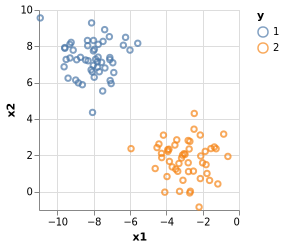

In [6]:
using VegaLite
dfBlobs |> @vlplot(:point, x=:x1, y=:x2, color = :"y:n") 

In [21]:
X, Y = MLJ.make_circles(100; noise=0.05, factor=0.3)
dfCircles = DataFrames.DataFrame(X)
dfCircles.y = Y
first(dfCircles, 3)

Row,x1,x2,y
,Float64,Float64,Cat…
1,0.229594,-0.200858,0
2,0.108614,0.349456,0
3,0.88774,-0.0581998,1


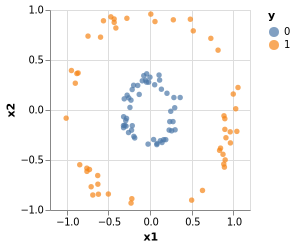

In [22]:
dfCircles |> @vlplot(:circle, x=:x1, y=:x2, color = :"y:n") 